In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
driver_ids = pd.read_csv("driver_ids.csv")

In [4]:
ride_ids = pd.read_csv("ride_ids.csv")

In [5]:
ride_timestamps = pd.read_csv("ride_timestamps.csv")

In [6]:
driver_ids.head(5)

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00


In [7]:
ride_ids.head(5)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100


In [8]:
ride_timestamps.head()

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05


In [9]:
df = ride_ids 

In [10]:
# Calculating ride fare 
ride_fare = []
short_ride = []
long_ride = []
for index, row in ride_ids.iterrows():
    distance = row["ride_distance"]/(1609.344)
    duration = row["ride_duration"]/(60)
    fare = round((2 + 1.75 + 1.15*distance + 0.22*duration),2) 
    ride_fare.append(fare)
    if row["ride_distance"] <= 2456:
        short_ride.append(1)
        long_ride.append(0)
    elif row["ride_distance"] >= 7166:
        short_ride.append(0)
        long_ride.append(1)
    else:
        short_ride.append(0)
        long_ride.append(0)

In [11]:
df["ride_fare"] = ride_fare

In [12]:
df["short_ride"] = short_ride

In [13]:
df["long_ride"] = long_ride

In [14]:
df.head(10)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_fare,short_ride,long_ride
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,6.24,1,0
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.12,0,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.19,0,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,62.64,0,1
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,9.71,0,0
5,002be0ffdc997bd5c50703158b7c2491,03d6b9d80b8a96135cb9b25178e9e203,4832,917,100,10.57,0,0
6,002be0ffdc997bd5c50703158b7c2491,04053c0ed21761e07f0b869cab5b7dd0,1575,347,0,6.15,1,0
7,002be0ffdc997bd5c50703158b7c2491,0534d432e0186625f623aaee57af98be,3056,687,25,8.45,0,0
8,002be0ffdc997bd5c50703158b7c2491,053a1621c0affcd2b9c517af5c2bc843,3940,1143,75,10.76,0,0
9,002be0ffdc997bd5c50703158b7c2491,066e92c52f59486de56cd7b8716a4ca6,3957,868,50,9.76,0,0


In [15]:
fare_per_driver = df.groupby("driver_id")["ride_fare"].sum()

In [16]:
fare_per_driver.head(10)

driver_id
002be0ffdc997bd5c50703158b7c2491    3093.52
007f0389f9c7b03ef97098422f902e62     275.38
011e5c5dfc5c2c92501b8b24d47509bc     427.29
0152a2f305e71d26cc964f8d4411add9    2407.49
01674381af7edd264113d4e6ed55ecda    4949.06
0213f8b59219e32142711992ca4ec01f    2674.24
021e5cd15ef0bb3ec20a12af99e142b3     567.86
0258e250ca195cc6258cbdc75aecd853    3880.57
028b5a4dcd7f4924ebfabcf2e814c014    4756.62
02d6a6b8a6da15fc219a9570f7ebbe78    1729.39
Name: ride_fare, dtype: float64

In [17]:
type(fare_per_driver)

pandas.core.series.Series

In [18]:
fare_df = fare_per_driver.to_frame()

In [19]:
fare_df.head()

,ride_fare
driver_id,
002be0ffdc997bd5c50703158b7c2491,3093.52
007f0389f9c7b03ef97098422f902e62,275.38
011e5c5dfc5c2c92501b8b24d47509bc,427.29
0152a2f305e71d26cc964f8d4411add9,2407.49
01674381af7edd264113d4e6ed55ecda,4949.06


In [20]:
fare_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 937 entries, 002be0ffdc997bd5c50703158b7c2491 to ffff51a71f2f185ec5e97d59dbcd7a78
Data columns (total 1 columns):
ride_fare    937 non-null float64
dtypes: float64(1)
memory usage: 14.6+ KB


In [21]:
# Don't need this if you have 2 collumns in fare_df.info()
# I only have 1 collumn
fare_df['driver_id'] = fare_df.index

In [22]:
fare_df.head()

,ride_fare,driver_id
driver_id,,
002be0ffdc997bd5c50703158b7c2491,3093.52,002be0ffdc997bd5c50703158b7c2491
007f0389f9c7b03ef97098422f902e62,275.38,007f0389f9c7b03ef97098422f902e62
011e5c5dfc5c2c92501b8b24d47509bc,427.29,011e5c5dfc5c2c92501b8b24d47509bc
0152a2f305e71d26cc964f8d4411add9,2407.49,0152a2f305e71d26cc964f8d4411add9
01674381af7edd264113d4e6ed55ecda,4949.06,01674381af7edd264113d4e6ed55ecda


In [23]:
fare_df.info()

# Now I have 2 collumns 

<class 'pandas.core.frame.DataFrame'>
Index: 937 entries, 002be0ffdc997bd5c50703158b7c2491 to ffff51a71f2f185ec5e97d59dbcd7a78
Data columns (total 2 columns):
ride_fare    937 non-null float64
driver_id    937 non-null object
dtypes: float64(1), object(1)
memory usage: 22.0+ KB


In [24]:
# Adding sum of fare for each driver 
df2 = pd.merge(driver_ids, fare_df)

C:\Users\KHANH TM NGUYEN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'driver_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [25]:
df2.head()

,driver_id,driver_onboard_date,ride_fare
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,3093.52
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00,275.38
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00,427.29
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00,2407.49
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00,4949.06


In [26]:
short_ride_df = df.groupby("driver_id")["short_ride"].sum().to_frame()

In [27]:
short_ride_df.head()

,short_ride
driver_id,
002be0ffdc997bd5c50703158b7c2491,72
007f0389f9c7b03ef97098422f902e62,10
011e5c5dfc5c2c92501b8b24d47509bc,11
0152a2f305e71d26cc964f8d4411add9,33
01674381af7edd264113d4e6ed55ecda,83


In [28]:
short_ride_df['driver_id'] = short_ride_df.index

In [29]:
long_ride_df = df.groupby("driver_id")["long_ride"].sum().to_frame()

In [30]:
long_ride_df['driver_id'] = long_ride_df.index

In [31]:
long_ride_df.head()

,long_ride,driver_id
driver_id,,
002be0ffdc997bd5c50703158b7c2491,52,002be0ffdc997bd5c50703158b7c2491
007f0389f9c7b03ef97098422f902e62,2,007f0389f9c7b03ef97098422f902e62
011e5c5dfc5c2c92501b8b24d47509bc,7,011e5c5dfc5c2c92501b8b24d47509bc
0152a2f305e71d26cc964f8d4411add9,69,0152a2f305e71d26cc964f8d4411add9
01674381af7edd264113d4e6ed55ecda,125,01674381af7edd264113d4e6ed55ecda


In [32]:
# Adding short ride + long ride statistics 
df3 = pd.merge(pd.merge(df2, short_ride_df), long_ride_df)

C:\Users\KHANH TM NGUYEN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'driver_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
df3.head()

,driver_id,driver_onboard_date,ride_fare,short_ride,long_ride
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,3093.52,72,52
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00,275.38,10,2
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00,427.29,11,7
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00,2407.49,33,69
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00,4949.06,83,125


In [34]:
df3.describe()

,ride_fare,short_ride,long_ride
count,854.000000,854.000000,854.000000
mean,2581.210820,54.391101,54.375878
std,2096.378017,47.250416,45.806007
min,24.600000,1.000000,0.000000
25%,564.147500,11.000000,14.000000
50%,2557.935000,53.000000,49.000000
75%,3941.240000,84.000000,82.000000
max,10730.040000,252.000000,281.000000


In [35]:
# Look at the drivers making least and most revenue 
df3.sort_values("ride_fare").head()

,driver_id,driver_onboard_date,ride_fare,short_ride,long_ride
430,7b625f643d0775f0ac4898e33235377b,2016-04-04 00:00:00,24.60,1,0
447,7ff85c5c0e9324e28d1e0d0589c364bd,2016-04-19 00:00:00,34.87,1,1
841,fd831ca1d79ae5c6fc3a679a22e5b8cf,2016-05-07 00:00:00,171.80,3,1
713,d31eded9263eab43f614eecc6a52a0f5,2016-05-07 00:00:00,191.19,4,2
390,706466935b9e1d04e4e116be7ce90ea9,2016-04-01 00:00:00,208.61,3,3


In [36]:
df3.sort_values("ride_fare").tail()

,driver_id,driver_onboard_date,ride_fare,short_ride,long_ride
664,c07499b5a6f1090f2fb263ec6ac0660c,2016-04-01 00:00:00,8951.03,136,223
274,4eb382d1f7d50fae1294964263d1ce82,2016-04-06 00:00:00,9272.95,245,168
461,844e9be5a30d8d9c1f8e9ddb086ff717,2016-04-15 00:00:00,9354.44,200,197
189,3788dc9e91f1548816ce8b5af07ddadc,2016-04-26 00:00:00,10204.67,219,215
316,5ccc0e6dc9c7475caf785cdce7b8eb7a,2016-04-05 00:00:00,10730.04,231,249


In [37]:
# Sort according to onboarding date 
driver_ids.sort_values("driver_onboard_date").head()

,driver_id,driver_onboard_date
432,72ca99bb6667024a23e1f68904b06fd0,2016-03-28 00:00:00
907,f86eb77e1cefe28e9f0e9d3775fae261,2016-03-28 00:00:00
107,1e9b964b3e3d0289794289579269247a,2016-03-28 00:00:00
895,f1b4411717c78f67380366c2a16a4d1e,2016-03-28 00:00:00
889,f0df79d10df44f18742682108b17f60a,2016-03-28 00:00:00


In [38]:
driver_ids.sort_values("driver_onboard_date").tail()

,driver_id,driver_onboard_date
165,2e5d7b104b570a5cf450f6825880c9dc,2016-05-15 00:00:00
909,f98673773627b4b8d152e2b168b85bb2,2016-05-15 00:00:00
822,df9ab418e87b21319bdfe389a4552e08,2016-05-15 00:00:00
926,fdbee494c73577d5b1266d1fec5c6c9a,2016-05-15 00:00:00
142,28a396a3e1793b64046aaaf8345604ec,2016-05-15 00:00:00


In [39]:
#for each unique driver -> 
#1. when was the last time he 'picked_up'?
#2. when was the first time he 'picked up'?
#3. when was the onboard data of this driver?

# Get names of indexes for which column Age has value 30



In [40]:
#first_picked_up = []
#last_picked_up = []
# ride_id =
#ride_timestamps_copy = []
ride_id_copy = []
timestamp_copy = []
for index, row in ride_timestamps.iterrows():
    if row["event"] == "picked_up_at":
        ride_id_copy.append(row["ride_id"])
        timestamp_copy.append(row["timestamp"])

In [41]:
ride_timestamps_copy = pd.DataFrame()
ride_timestamps_copy["ride_id"] = ride_id_copy
ride_timestamps_copy["timestamp"] = timestamp_copy

In [42]:
ride_timestamps_copy.head()

,ride_id,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,2016-06-13 09:44:33
1,00005eae40882760d675da5effb89ae3,2016-05-14 05:26:18
2,000061d42cf29f73b591041d9a1b2973,2016-05-16 15:47:32
3,00006efeb0d5e3ccad7d921ddeee9900,2016-05-11 19:35:15
4,0000d9b24d8ccdd991b76258e616fa01,2016-04-26 18:16:55


In [43]:
# Merge each ride id with its picked up time 
ride_id_timestamp = pd.merge(ride_ids, ride_timestamps_copy)

In [44]:
ride_id_timestamp.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_fare,short_ride,long_ride,timestamp
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,6.24,1,0,2016-04-23 02:16:40
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.12,0,0,2016-03-29 19:04:01
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.19,0,0,2016-06-21 12:01:35
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,62.64,0,1,2016-05-19 09:18:20
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,9.71,0,0,2016-04-20 22:07:02


In [45]:
ride_id_timestamp.info()

# Timestamp now is an object. We need to convert it to date object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184819 entries, 0 to 184818
Data columns (total 9 columns):
driver_id          184819 non-null object
ride_id            184819 non-null object
ride_distance      184819 non-null int64
ride_duration      184819 non-null int64
ride_prime_time    184819 non-null int64
ride_fare          184819 non-null float64
short_ride         184819 non-null int64
long_ride          184819 non-null int64
timestamp          184819 non-null object
dtypes: float64(1), int64(5), object(3)
memory usage: 14.1+ MB


In [46]:
ride_id_timestamp['timestamp'] =  pd.to_datetime(ride_id_timestamp['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [47]:
ride_id_timestamp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184819 entries, 0 to 184818
Data columns (total 9 columns):
driver_id          184819 non-null object
ride_id            184819 non-null object
ride_distance      184819 non-null int64
ride_duration      184819 non-null int64
ride_prime_time    184819 non-null int64
ride_fare          184819 non-null float64
short_ride         184819 non-null int64
long_ride          184819 non-null int64
timestamp          184819 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 14.1+ MB


In [48]:
ride_id_timestamp.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_fare,short_ride,long_ride,timestamp
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,6.24,1,0,2016-04-23 02:16:40
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.12,0,0,2016-03-29 19:04:01
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.19,0,0,2016-06-21 12:01:35
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,62.64,0,1,2016-05-19 09:18:20
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,9.71,0,0,2016-04-20 22:07:02


In [49]:
ride_id_timestamp["new_date"] = [d.date() for d in ride_id_timestamp["timestamp"]]
ride_id_timestamp["new_time"] = [d.time() for d in ride_id_timestamp["timestamp"]]

In [50]:
ride_id_timestamp.head()

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time,ride_fare,short_ride,long_ride,timestamp,new_date,new_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50,6.24,1,0,2016-04-23 02:16:40,2016-04-23,02:16:40
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0,9.12,0,0,2016-03-29 19:04:01,2016-03-29,19:04:01
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0,8.19,0,0,2016-06-21 12:01:35,2016-06-21,12:01:35
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25,62.64,0,1,2016-05-19 09:18:20,2016-05-19,09:18:20
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100,9.71,0,0,2016-04-20 22:07:02,2016-04-20,22:07:02


In [51]:
first_ride = ride_id_timestamp.groupby("driver_id")["timestamp"].min()

In [52]:
first_ride.head()

driver_id
002be0ffdc997bd5c50703158b7c2491   2016-03-29 18:50:01
007f0389f9c7b03ef97098422f902e62   2016-03-29 22:33:44
011e5c5dfc5c2c92501b8b24d47509bc   2016-04-05 10:56:24
0152a2f305e71d26cc964f8d4411add9   2016-04-25 16:06:32
01674381af7edd264113d4e6ed55ecda   2016-04-29 07:55:52
Name: timestamp, dtype: datetime64[ns]

In [53]:
type(first_ride)

pandas.core.series.Series

In [55]:
last_ride = ride_id_timestamp.groupby("driver_id")["timestamp"].max()

In [56]:
last_ride.head()

driver_id
002be0ffdc997bd5c50703158b7c2491   2016-06-23 10:08:13
007f0389f9c7b03ef97098422f902e62   2016-06-22 13:20:22
011e5c5dfc5c2c92501b8b24d47509bc   2016-06-12 20:23:36
0152a2f305e71d26cc964f8d4411add9   2016-06-26 10:24:55
01674381af7edd264113d4e6ed55ecda   2016-06-24 13:07:43
Name: timestamp, dtype: datetime64[ns]

In [57]:
first_ride_df = first_ride.to_frame()
last_ride_df = last_ride.to_frame()

In [58]:
first_ride_df['driver_id'] = first_ride_df.index
last_ride_df['driver_id'] = last_ride_df.index

In [59]:
first_ride_df.rename(columns={'timestamp':'first_ride'}, inplace=True)
last_ride_df.rename(columns={'timestamp':'last_ride'}, inplace=True)

In [60]:
df4 = pd.merge(pd.merge(df3, first_ride_df), last_ride_df)

C:\Users\KHANH TM NGUYEN\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning: 'driver_id' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [61]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 837 entries, 0 to 836
Data columns (total 7 columns):
driver_id              837 non-null object
driver_onboard_date    837 non-null object
ride_fare              837 non-null float64
short_ride             837 non-null int64
long_ride              837 non-null int64
first_ride             837 non-null datetime64[ns]
last_ride              837 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 52.3+ KB


In [62]:
df4.head()

,driver_id,driver_onboard_date,ride_fare,short_ride,long_ride,first_ride,last_ride
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00,3093.52,72,52,2016-03-29 18:50:01,2016-06-23 10:08:13
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00,275.38,10,2,2016-03-29 22:33:44,2016-06-22 13:20:22
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00,427.29,11,7,2016-04-05 10:56:24,2016-06-12 20:23:36
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00,2407.49,33,69,2016-04-25 16:06:32,2016-06-26 10:24:55
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00,4949.06,83,125,2016-04-29 07:55:52,2016-06-24 13:07:43


In [63]:
df4['driver_onboard_date'] =  pd.to_datetime(df4['driver_onboard_date'], format='%Y-%m-%d %H:%M:%S')

In [64]:
life_time_lst = []
set_up_time_lst = []
ltv_lst = []
for index, row in df4.iterrows():
    life_time = row["last_ride"].date()-row["first_ride"].date()
    set_up_time = row["first_ride"].date()-row["driver_onboard_date"].date()
    day = life_time.days
    ltv = round((row["ride_fare"]/day)*30,2)
    life_time_lst.append(life_time)
    set_up_time_lst.append(set_up_time)
    ltv_lst.append(ltv)

In [65]:
# Lifetime = Time last ride - Time first ride
life_time_lst

[datetime.timedelta(86),
 datetime.timedelta(85),
 datetime.timedelta(68),
 datetime.timedelta(62),
 datetime.timedelta(56),
 datetime.timedelta(30),
 datetime.timedelta(49),
 datetime.timedelta(61),
 datetime.timedelta(51),
 datetime.timedelta(51),
 datetime.timedelta(48),
 datetime.timedelta(75),
 datetime.timedelta(61),
 datetime.timedelta(53),
 datetime.timedelta(76),
 datetime.timedelta(73),
 datetime.timedelta(8),
 datetime.timedelta(30),
 datetime.timedelta(41),
 datetime.timedelta(66),
 datetime.timedelta(39),
 datetime.timedelta(79),
 datetime.timedelta(31),
 datetime.timedelta(57),
 datetime.timedelta(13),
 datetime.timedelta(67),
 datetime.timedelta(74),
 datetime.timedelta(36),
 datetime.timedelta(81),
 datetime.timedelta(27),
 datetime.timedelta(71),
 datetime.timedelta(67),
 datetime.timedelta(87),
 datetime.timedelta(33),
 datetime.timedelta(80),
 datetime.timedelta(28),
 datetime.timedelta(74),
 datetime.timedelta(87),
 datetime.timedelta(62),
 datetime.timedelta(43),
 

In [66]:
# Set up time = Time first ride - Onboarding time 
set_up_time_lst

[datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(2),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(1),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timedelta(0),
 datetime.timede

In [67]:
# Lifetive value per month = (Total fare/Lifetime (by day))*30 days
ltv_lst

[1079.13,
 97.19,
 188.51,
 1164.91,
 2651.28,
 2674.24,
 347.67,
 1908.48,
 2798.01,
 1017.29,
 449.33,
 1054.27,
 211.25,
 2329.65,
 1023.46,
 1720.78,
 1776.04,
 749.63,
 2951.39,
 291.32,
 356.55,
 1514.85,
 601.21,
 2099.19,
 1043.95,
 1998.35,
 1294.3,
 178.44,
 718.81,
 396.66,
 2885.18,
 2914.95,
 124.51,
 428.68,
 1818.85,
 424.8,
 1796.08,
 1265.69,
 1352.55,
 309.83,
 1362.03,
 1961.42,
 609.72,
 205.23,
 2552.25,
 2163.76,
 2487.05,
 639.74,
 724.17,
 1225.5,
 210.22,
 2101.97,
 3799.7,
 880.43,
 735.85,
 598.86,
 2742.36,
 500.22,
 1397.88,
 95.53,
 189.29,
 496.17,
 1692.17,
 383.4,
 842.37,
 2222.45,
 2145.65,
 796.52,
 3173.29,
 668.22,
 520.24,
 2277.6,
 1953.1,
 231.14,
 828.31,
 1186.61,
 365.73,
 1752.96,
 638.71,
 1762.38,
 2095.77,
 155.78,
 1541.98,
 1354.92,
 2747.63,
 1599.14,
 2069.01,
 967.93,
 3005.07,
 426.99,
 502.23,
 2857.46,
 2144.32,
 299.79,
 1761.68,
 1563.72,
 1736.61,
 3049.54,
 1750.82,
 349.31,
 237.79,
 1198.53,
 318.76,
 385.7,
 1921.14,
 3923.

In [68]:
df4["lifetime"] = life_time_lst
df4["set_up_time"] = set_up_time_lst
df4["lifetime_value_per_month"] = ltv_lst 

In [69]:
df4.head()

,driver_id,driver_onboard_date,ride_fare,short_ride,long_ride,first_ride,last_ride,lifetime,set_up_time,lifetime_value_per_month
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,3093.52,72,52,2016-03-29 18:50:01,2016-06-23 10:08:13,86 days,0 days,1079.13
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,275.38,10,2,2016-03-29 22:33:44,2016-06-22 13:20:22,85 days,0 days,97.19
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,427.29,11,7,2016-04-05 10:56:24,2016-06-12 20:23:36,68 days,0 days,188.51
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23,2407.49,33,69,2016-04-25 16:06:32,2016-06-26 10:24:55,62 days,2 days,1164.91
4,01674381af7edd264113d4e6ed55ecda,2016-04-29,4949.06,83,125,2016-04-29 07:55:52,2016-06-24 13:07:43,56 days,0 days,2651.28


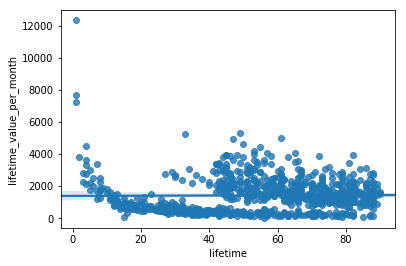

In [79]:
sns.regplot(x=df4["lifetime"].dt.days, y=df4["lifetime_value_per_month"])

C:\Users\KHANH TM NGUYEN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


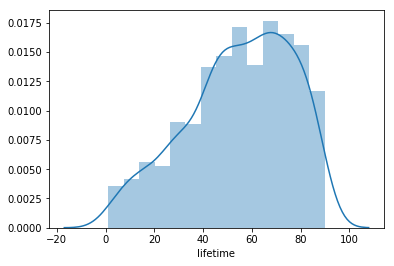

In [78]:
sns.distplot(df4["lifetime"].dt.days)

C:\Users\KHANH TM NGUYEN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


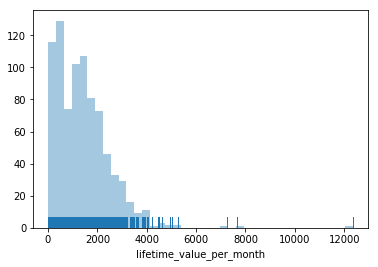

In [88]:
sns.distplot(df4["lifetime_value_per_month"], kde = False, rug = True)

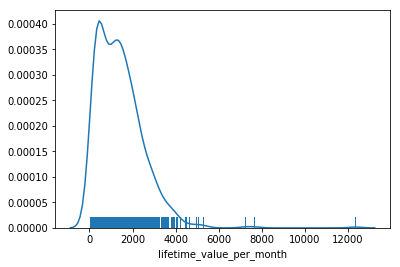

In [91]:
sns.distplot(df4["lifetime_value_per_month"], hist = False, rug = True)

In [97]:
# 25% of people make most income 
df4["lifetime_value_per_month"].quantile(0.75)

2015.29

In [98]:
# 75% of people make low income 
df4["lifetime_value_per_month"].quantile(0.25)

524.12

In [99]:
df5 = df4.copy()

In [100]:
top_25 = []
last_25 = []
for index, row in df5.iterrows():
    if row["lifetime_value_per_month"] >= 2015.29:
        top_25.append(1)
        last_25.append(0)
    elif row["lifetime_value_per_month"] <= 524.12:
        last_25.append(1)
        top_25.append(0)
    else:
        top_25.append(0)
        last_25.append(0)

In [102]:
df5["top_25"] = top_25
df5["last_25"] = last_25
df5.head()

,driver_id,driver_onboard_date,ride_fare,short_ride,long_ride,first_ride,last_ride,lifetime,set_up_time,lifetime_value_per_month,top_25,last_25
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,3093.52,72,52,2016-03-29 18:50:01,2016-06-23 10:08:13,86 days,0 days,1079.13,0,0
1,007f0389f9c7b03ef97098422f902e62,2016-03-29,275.38,10,2,2016-03-29 22:33:44,2016-06-22 13:20:22,85 days,0 days,97.19,0,1
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,427.29,11,7,2016-04-05 10:56:24,2016-06-12 20:23:36,68 days,0 days,188.51,0,1
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23,2407.49,33,69,2016-04-25 16:06:32,2016-06-26 10:24:55,62 days,2 days,1164.91,0,0
4,01674381af7edd264113d4e6ed55ecda,2016-04-29,4949.06,83,125,2016-04-29 07:55:52,2016-06-24 13:07:43,56 days,0 days,2651.28,1,0


In [114]:
# Descriptive stats for the top 25% driver 
n1 = df5["top_25"].count()
mean1 = df5.groupby("top_25")["ride_fare"].mean()
median1 = df5.groupby("top_25")["ride_fare"].median()
std1 = df5.groupby("top_25")["ride_fare"].std()
print("Count:", n1)
print("Mean:", mean1)
print("Median:", median1)
print("Standard deviation:", std1)

Count: 837
Mean: top_25
0    1833.508246
1    4934.130714
Name: ride_fare, dtype: float64
Median: top_25
0    1114.20
1    4937.27
Name: ride_fare, dtype: float64
Standard deviation: top_25
0    1450.715749
1    2048.636125
Name: ride_fare, dtype: float64


In [115]:
# Descriptive stats for the last 25% driver 
n2 = df5["last_25"].count()
mean2 = df5.groupby("last_25")["ride_fare"].mean()
median2 = df5.groupby("last_25")["ride_fare"].median()
std2 = df5.groupby("last_25")["ride_fare"].std()
print("Count:", n2)
print("Mean:", mean2)
print("Median:", median2)
print("Standard deviation:", std2)

Count: 837
Mean: last_25
0    3322.711786
1     487.794429
Name: ride_fare, dtype: float64
Median: last_25
0    3146.02
1     459.78
Name: ride_fare, dtype: float64
Standard deviation: last_25
0    1972.836711
1     173.216955
Name: ride_fare, dtype: float64


In [119]:
import statistics as stats 
from scipy.stats import t

#Standard error
se = ((std1**2/n1)+(std2**2/n2))**0.5 
t_score = abs(mean1-mean2)/se

#Degree of freedom is subtracting 1 from the smaller sample size
degree_of_freedom = min(n1, n2) - 1
p_value = 2*t.cdf(-t_score, degree_of_freedom)
SD_pooled = (((std1**2)*(n1-1)+(std2**2)*(n2-1))/(n1+n2-2))**0.5
effect_size = (mean2 - mean1)/SD_pooled

print("Standard error: ", round(se,3))
print("T-score: ", round(t_score, 3))
print("p-value: ", p_value)
print("Effect size: ", round(effect_size,3))

Standard error:  top_25
0    84.643
1    71.064
Name: ride_fare, dtype: float64
T-score:  top_25
0    17.594
1    62.568
Name: ride_fare, dtype: float64
p-value:  [3.45599157e-059 1.19497286e-317]
Effect size:  last_25
0    0.860
1   -3.058
Name: ride_fare, dtype: float64
